# LASSO Regularized Regression using the Homotopy Method: Visualization and Explanation

## LASSO Regularized Regression using the Homotopy Method

The **Least Absolute Shrinkage and Selection Operator (LASSO)** is a popular regression technique that not only performs regression but simultaneously selects relevant features through sparsity in its solutions.

The LASSO regression problem can be formulated as

$$
\min_{\theta} \frac{1}{2}\|X\theta - y\|_2^2 + μ\|\theta\|_1
$$

- \( X \) is the feature matrix.
- \( y \) is the target vector.
- \( μ \) controls the amount of regularization.

### Why use the Homotopy method?
The **Homotopy method** provides an efficient, incremental solution, particularly beneficial when new data points are observed sequentially. The model updates its parameters efficiently by moving continuously through solution paths (homotopies).
on paths (homotopies).


In [1]:
import sys
import os

sys.path.append(os.path.abspath('../'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from model.LassoHomotopy import LassoHomotopyModel
np.random.seed(42)

##  Generate Synthetic Dataset

In [3]:
X = np.random.randn(100, 10)
true_coeffs = np.array([2.5, 0, 0, 0, -1.5, 0, 0, 0, 0, 3.0])
y = X @ true_coeffs + np.random.randn(100) * 0.1

print("True coefficients:", true_coeffs)

True coefficients: [ 2.5  0.   0.   0.  -1.5  0.   0.   0.   0.   3. ]


##  Fitting the LASSO Homotopy Model

In [4]:
# Fit the model
model = LassoHomotopyModel(reg_param=0.1)
results = model.fit(X, y)

# Display estimated coefficients
print("Estimated coefficients:", results.coefficients)

Estimated coefficients: [ 2.35945575  0.          0.          0.         -1.41220528  0.
  0.          0.          0.          2.88674429]


##  Visualizing True vs Estimated Coefficients

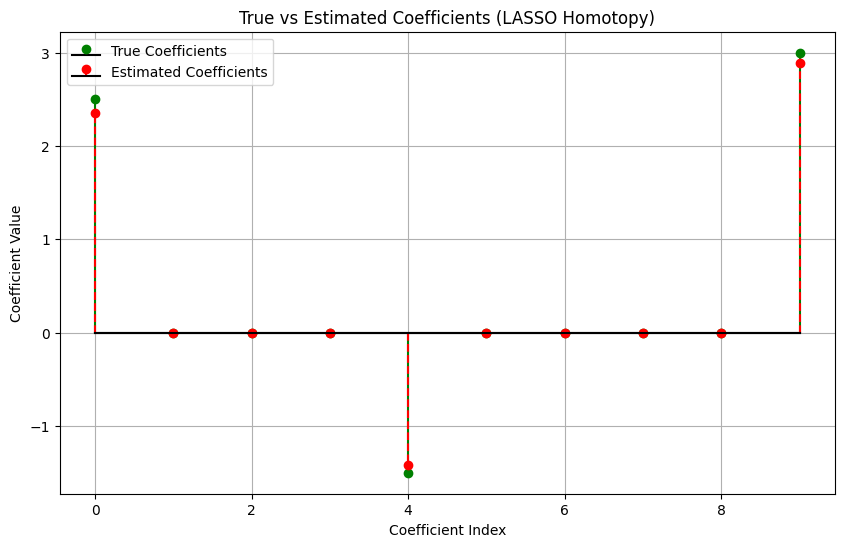

In [5]:
plt.figure(figsize=(10, 6))
plt.stem(true_coeffs, markerfmt='go', linefmt='g-', basefmt='k-', label="True Coefficients")
plt.stem(results.coefficients, markerfmt='ro', linefmt='r--', basefmt='k-', label="Estimated Coefficients")
plt.title("True vs Estimated Coefficients (LASSO Homotopy)")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()

### Interpretation of Sparsity

- The green points represent **true underlying coefficients** used to generate the data.
- The red points show the **coefficients estimated by the LASSO Homotopy modeltice:
- The LASSO algorithm successfully identifies irrelevant features and sets their coefficients to zero.
- Sparsity simplifies interpretation and highlights truly influential features.


##  Visualizing Prediction Accuracy

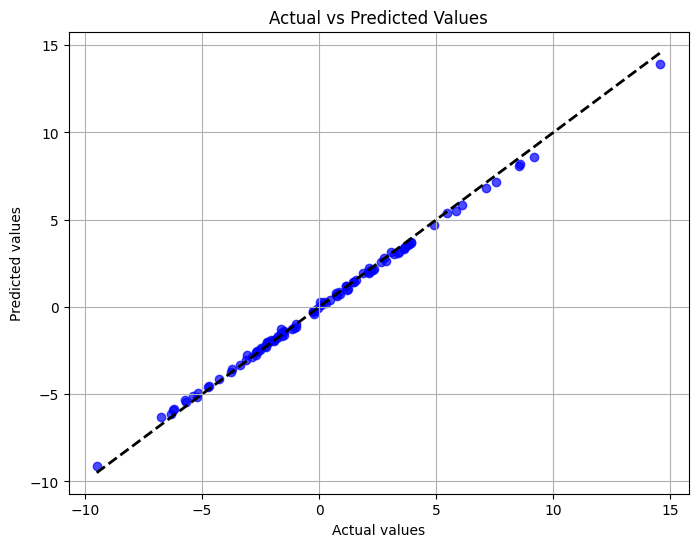

In [6]:
y_pred = results.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

## Incremental Updates (Homotopy Visualization)

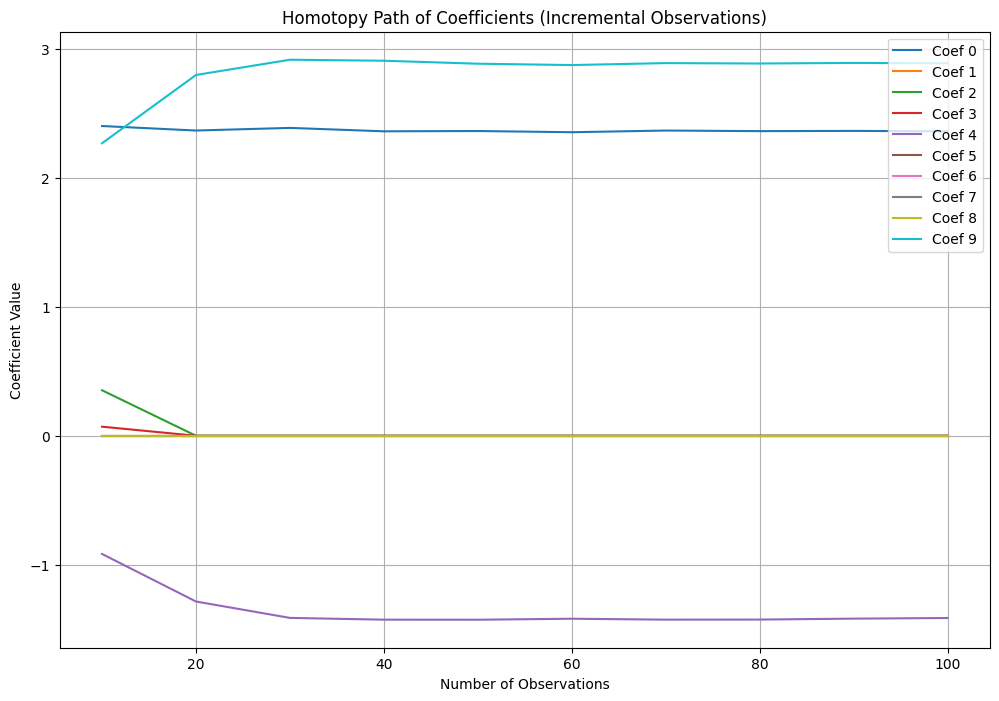

In [7]:
coeff_history = []

# Fit incrementally
for i in range(10, 101, 10):
    model_partial = LassoHomotopyModel(reg_param=0.1)
    partial_result = model_partial.fit(X[:i], y[:i])
    coeff_history.append(partial_result.coefficients)

coeff_history = np.array(coeff_history)

plt.figure(figsize=(12, 8))
for coef_idx in range(10):
    plt.plot(range(10, 101, 10), coeff_history[:, coef_idx], label=f"Coef {coef_idx}")
plt.xlabel("Number of Observations")
plt.ylabel("Coefficient Value")
plt.title("Homotopy Path of Coefficients (Incremental Observations)")
plt.legend()
plt.grid(True)
plt.show()

### Incremental Observations Interpretation

- This plot visualizes how the **Homotopy method incrementally updates coefficient estimates** as new data points are observed.
- Stability in lines indicates robustness; sharp jumps highlight the entry or exit of features from the active set.
- Such visualization provides insights into **feature importance and stability** over incremental learning.

## Conclusion

- **LASSO Homotopy regression** effectively performs **feature selection and regularization**.
- Sparsity achieved by the LASSO method simplifies the model, making it **interpretable and efficient**.
- **Homotopy methods** provide efficiency when data arrives sequentially, making the model adaptable in real-time scenarios.

The above visualizations not only illustrate the working principle of the Homotopy LASSO model but also highlight the advantages of incremental learning in regression tasks.
